# import lib

In [18]:
import pandas
import configparser
import psycopg2

# connect to db

In [19]:
config = configparser.ConfigParser()
config.read('config.ini')

host=config['myaws']['host']
db=config['myaws']['db']
user=config['myaws']['user']
pwd = config['myaws']['pwd']

conn = psycopg2.connect(  host=host,
                       user=user,
                       password = pwd,
                       dbname=db)

In [20]:
cur=conn.cursor()

# q1

In [21]:
sql_q1 =  """ select * from gp17.student """

In [22]:
df=pandas.read_sql_query(sql_q1,conn)
df[:]

,s_email,s_name,s_major
0,chris@dukes.jmu.edu,Alyssa Christenbury,IA
1,abc@dukes.jmu.edu,Avalon Roberts,IA
2,123@dukes.jmu.edu,Emily Ricard,IA
3,maddy@dukes.jmu.edu,Maddy Rojas,IA


# q2

In [23]:
sql_q2 =""" select professor.p_name,
                gp17.course.c_name
                from gp17.professor
                inner join gp17.course
                on gp17.professor.p_email = gp17.course.p_email 
        """

In [24]:
df= pandas.read_sql_query(sql_q2,conn)
df[:]

,p_name,c_name
0,Stephen Marrin,Seminar on Issues
1,Orlandrew Danzell,AntiMoney Laundering
2,Noel Hendrickson,Futures Analysis
3,Abc,Intelligence
4,Abc,Data Mining


# q3

In [25]:
sql_q3 = """ select c_number,
            count(c_number) as enrolled
            from gp17.enroll_list
            group by c_number
            order by enrolled desc
            """

<AxesSubplot:xlabel='c_number'>

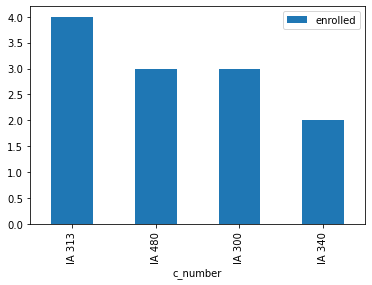

In [26]:
df= pandas.read_sql_query(sql_q3,conn)
df.plot.bar(y= 'enrolled', x= 'c_number')

# q4

In [27]:
sql_q4 =""" select professor.p_name,
                count(gp17.course.c_name) as teaching_number
                from gp17.professor
                inner join gp17.course
                on gp17.professor.p_email = gp17.course.p_email 
                group by professor.p_name
                order by teaching_number desc
        """

<AxesSubplot:xlabel='p_name'>

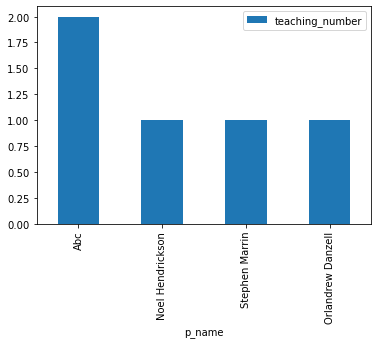

In [28]:
df= pandas.read_sql_query(sql_q4,conn)
df.plot.bar(y= 'teaching_number', x= 'p_name')

# q5

In [29]:
sql_q5_professor = """
                    insert into gp17.professor(p_email, p_name, p_office)
                    values('{}', '{}', '{}')
                    """ .format('ia_new', 'new_c_name', 'online', 'new_p@jmu.edu')

In [30]:
cur.execute(sql_q5_professor)

In [31]:
conn.commit()

In [34]:
df= pandas.read_sql_query('select * from gp17.course',conn)
df[:]

,c_number,c_name,c_room,p_email
0,IA 300,Seminar on Issues,ISAT 150,marrinsp@jmu.edu
1,IA 480,AntiMoney Laundering,ISAT 148,danzelox@jmu.edu
2,IA 313,Futures Analysis,Engeo 1204,hendrinx@jmu.edu
3,IA 200,Intelligence,400,abc@jmu.edu
4,IA 340,Data Mining,ISAT 2010,abc@jmu.edu


# q6

In [35]:
sql_q6_course = """
                update gp17.course
                set p_email = '{}'
                where p_email = '{}'
                                
                """.format('new_p@jmu.edu', 'weixx@jmu.edu')

In [36]:
cur.execute(sql_q6_course)

In [39]:
#cur.execute('ROLLBACK')

In [41]:
conn.commit()

In [42]:
df=pandas.read_sql_query('select * from gp17.course', conn)
df[:]

,c_number,c_name,c_room,p_email
0,IA 300,Seminar on Issues,ISAT 150,marrinsp@jmu.edu
1,IA 480,AntiMoney Laundering,ISAT 148,danzelox@jmu.edu
2,IA 313,Futures Analysis,Engeo 1204,hendrinx@jmu.edu
3,IA 200,Intelligence,400,abc@jmu.edu
4,IA 340,Data Mining,ISAT 2010,abc@jmu.edu


In [43]:
sql_q6_professor =  """
                delete from gp17.professor
                where p_email = '{}'
                                
                """.format('weixx@jmu.edu')

In [44]:
cur.execute(sql_q6_professor)

In [45]:
conn.commit()

In [46]:
df=pandas.read_sql_query('select * from gp17.professor', conn)
df[:]

,p_email,p_name,p_office
0,danzelox@jmu.edu,Orlandrew Danzell,ISAT 322
1,hendrinx@jmu.edu,Noel Hendrickson,engeo 123
2,marrinsp@jmu.edu,Stephen Marrin,engeo 140
3,abc@jmu.edu,Abc,Engeo 421
4,ia_new,new_c_name,online


# close connection

In [47]:
cur.close()
conn.close()